# CS353 - Machine Learning Lab exam
## Section 2
## Name: Hardik L Harti
## Roll number : 181CO220

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#importing cancer dataset
df=pd.read_csv(r'data.csv')
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [3]:
#data preprocessing [1:Malignant tumor and 0:Benign tumor]
le = preprocessing.LabelEncoder()
df["diagnosis"]=le.fit_transform(df["diagnosis"])
df["diagnosis"].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [4]:
#renaming target column
df.rename(columns= {"diagnosis":"target"}, inplace=True)
df.target.value_counts()

0    357
1    212
Name: target, dtype: int64

In [5]:
#dropping unwanted columns
df=df.drop(['id'], axis=1)
df=df.drop(['Unnamed: 32'], axis=1)

df.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y=df.target
X=df.drop(['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)



In [7]:
#defining a knn function for a particular k 
def knearestneighbour(x):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acc=accuracy_score(y_true=y_test, y_pred=y_pred)
    return acc


In [8]:
#runnin a loop from 2-20 to find the optimal k
maxa=-1
maxi=0
for i in range(2,20):
    acc=knearestneighbour(i)
    print("Accuracy for (K=",i,"): ", acc)
    if acc>maxa:
        maxa=acc
        maxi=i

Accuracy for (K= 2 ):  0.9230769230769231
Accuracy for (K= 3 ):  0.9230769230769231
Accuracy for (K= 4 ):  0.916083916083916
Accuracy for (K= 5 ):  0.9300699300699301
Accuracy for (K= 6 ):  0.916083916083916
Accuracy for (K= 7 ):  0.9300699300699301
Accuracy for (K= 8 ):  0.9300699300699301
Accuracy for (K= 9 ):  0.9300699300699301
Accuracy for (K= 10 ):  0.9230769230769231
Accuracy for (K= 11 ):  0.9300699300699301
Accuracy for (K= 12 ):  0.9230769230769231
Accuracy for (K= 13 ):  0.9230769230769231
Accuracy for (K= 14 ):  0.9230769230769231
Accuracy for (K= 15 ):  0.9230769230769231
Accuracy for (K= 16 ):  0.916083916083916
Accuracy for (K= 17 ):  0.9230769230769231
Accuracy for (K= 18 ):  0.916083916083916
Accuracy for (K= 19 ):  0.916083916083916


In [9]:
#printing accuracy and report for best k
knn = KNeighborsClassifier(n_neighbors=maxi)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('Best accuracy is obtained for K=',maxi)
print('Accuracy by id3 ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('Report',classification_report(y_test, y_pred))

Best accuracy is obtained for K= 5
Accuracy by id3  0.9300699300699301
Report               precision    recall  f1-score   support

           0       0.95      0.93      0.94        87
           1       0.90      0.93      0.91        56

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



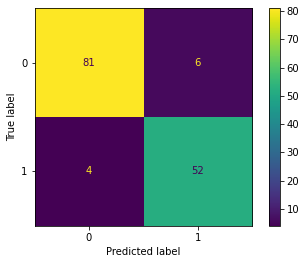

In [10]:
#printing confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)

Text(0.5, 0.98, 'Prediction result of KNN classifier  1:Malignant tumor and 0:Benign tumor')

<Figure size 432x288 with 0 Axes>

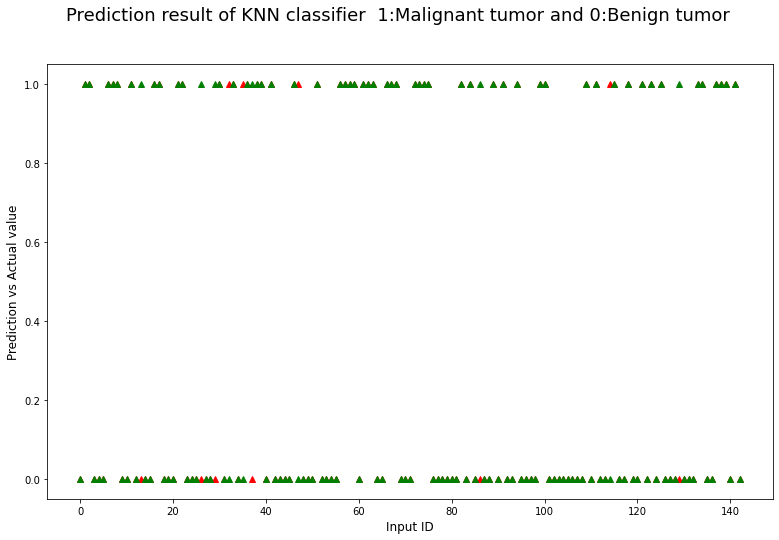

In [11]:
#plotting a small graph for checking correct and wrong predictions

plt.clf()
plt.figure(figsize=(13,8))

# Red coloured plots are the actual values that don't match with prediction (green plots). Note that green plots are plotted over red ones, hence correct predictions are hidden

plt.plot(np.arange(0,len(y_test),1), y_test, 'r^', np.arange(0,len(y_test),1), y_pred, 'g^')
plt.xlabel('Input ID', fontsize=12)
plt.ylabel('Prediction vs Actual value', fontsize=12)
plt.suptitle('Prediction result of KNN classifier  1:Malignant tumor and 0:Benign tumor', fontsize = 18)